### Data is from https://github.com/zygmuntz/goodbooks-10k

# Load in Libraries and Datasets

In [1]:
# Import Necessary Libraries

import pandas as pd
pd.set_option('display.max_columns', 100)
from collections import Counter
from matplotlib import pyplot
import seaborn as sns

In [2]:
# Import and Preview 'ratings.csv' Dataset

ratings_df = pd.read_csv('ratings.csv')
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [3]:
# Import and Preview 'book_tags.csv' Dataset

tags_df = pd.read_csv('book_tags.csv')
tags_df.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [4]:
# Import and Preview 'tags.csv' Dataset

tag_name_df = pd.read_csv('tags.csv')
tag_name_df.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [5]:
# Import and Preview 'books.csv' Dataset

books_df = pd.read_csv('books.csv')
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


# Data Cleaning & Preprocessing

In [6]:
# Merge 'tags_df', 'name_df' and 'books_df' into one dataframe

df = pd.merge(tags_df, tag_name_df, on='tag_id')
df = pd.merge(df, books_df, on= 'goodreads_book_id')
df.head()

,goodreads_book_id,tag_id,count,tag_name,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,30574,167697,to-read,27,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
1,1,11305,37174,fantasy,27,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
2,1,11557,34173,favorites,27,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
3,1,8717,12986,currently-reading,27,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
4,1,33114,12716,young-adult,27,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...


In [7]:
# Create new dataframe with necessary columns

df = df[['book_id', 'tag_name', 'authors', 'title', 'language_code', 'average_rating']]
df.head()

,book_id,tag_name,authors,title,language_code,average_rating
0,27,to-read,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54
1,27,fantasy,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54
2,27,favorites,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54
3,27,currently-reading,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54
4,27,young-adult,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54


# Exploratory Data Analysis

In [8]:
# View df datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999912 entries, 0 to 999911
Data columns (total 6 columns):
book_id           999912 non-null int64
tag_name          999912 non-null object
authors           999912 non-null object
title             999912 non-null object
language_code     891518 non-null object
average_rating    999912 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 53.4+ MB


In [9]:
# Get the most common tag per book

tags = df.groupby(['title'])['tag_name'].max()
t_df = pd.DataFrame([tuple((title, tag)) for title, tag in tags.items()])
t_df.rename({0:'title',1:'tag'},axis=1, inplace=True)
df = pd.merge(df, t_df, on='title', how='left')
df.head()

,book_id,tag_name,authors,title,language_code,average_rating,tag
0,27,to-read,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,youth
1,27,fantasy,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,youth
2,27,favorites,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,youth
3,27,currently-reading,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,youth
4,27,young-adult,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,youth


In [10]:
# 'rating_df' and 'df' are different sizes, so it will be a left-merge to preserve the ratings dataframe

print('merged data size: ', df.shape)
print('ratings data size: ', ratings_df.shape)

merged data size:  (999912, 7)
ratings data size:  (5976479, 3)


In [11]:
# Drop redundant columns and duplicates and left merge ratings_df with df

df.drop(columns=['tag_name'], inplace=True)
df = df.drop_duplicates()
df = pd.merge(ratings_df, df, on='book_id', how='left')
df.head()

,user_id,book_id,rating,authors,title,language_code,average_rating,tag
0,1,258,5,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,eng,4.24,wish-list
1,2,4081,4,Tom Wolfe,I am Charlotte Simmons,en-US,3.40,young-adult
2,2,260,5,Dale Carnegie,How to Win Friends and Influence People,eng,4.13,تنمية-بشرية
3,2,9296,5,"Alice Miller, Ruth Ward",The Drama of the Gifted Child: The Search for ...,en-GB,4.09,wish-list
4,2,2318,3,"Thomas J. Stanley, William D. Danko",The Millionaire Next Door: The Surprising Secr...,eng,4.00,wish-list


In [12]:
df.shape

(5976479, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976479 entries, 0 to 5976478
Data columns (total 8 columns):
user_id           int64
book_id           int64
rating            int64
authors           object
title             object
language_code     object
average_rating    float64
tag               object
dtypes: float64(1), int64(3), object(4)
memory usage: 410.4+ MB


Counter({4: 2139018, 5: 1983093, 3: 1370916, 2: 359257, 1: 124195})


/Users/erikadauria/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


[Text(0, 0.5, 'Number of Stars'), Text(0.5, 0, 'Rating Count')]

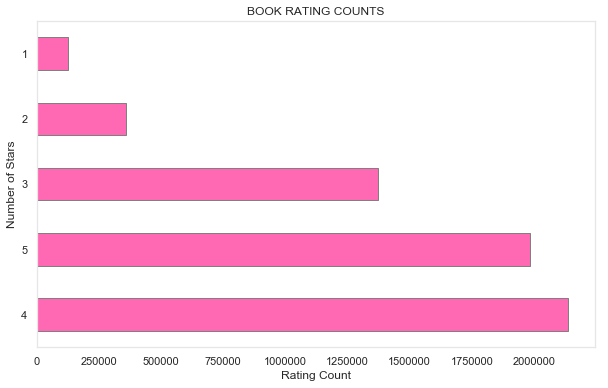

In [37]:
# View ratings distribution

print(Counter(sorted(df['rating'])))

fig, ax = pyplot.subplots(figsize=(10,6))
sns.set_style('white',{'axes.edgecolor': '.9'},)
df['rating'].value_counts().plot(kind='barh',color='hotpink',edgecolor='gray', title='BOOK RATING COUNTS')
fig.show()
ax.set(xlabel='Rating Count', ylabel='Number of Stars')

Text(33.88460590277778, 0.5, 'review_count')

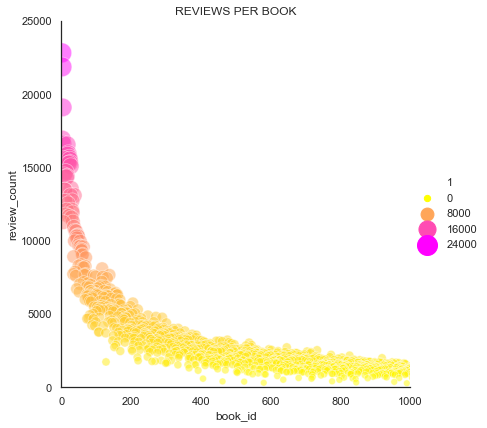

In [34]:
# View number of reviews per book

count = df['book_id'].value_counts()
tuples = [tuple((x, y)) for x, y in count.items()]
tup_df = pd.DataFrame(tuples)

sns.set(style="white")
ax = sns.relplot(x=0, y=1, size=1,
            sizes=(40, 400), alpha=.5, palette='spring_r',
            height=6, data=tup_df, hue=1)

axes = ax.axes.flatten()
axes[0].set_title("REVIEWS PER BOOK")
axes[0].set_xlim(0,1000)
axes[0].set_ylim(0,25000)
axes[0].set_xlabel("book_id")
axes[0].set_ylabel("review_count")

In [16]:
df['book_id'].value_counts().max() # Most reviewed book (book id =1)

22806

In [17]:
df[df['book_id']==1].title[0:1] # Most reviewed book was "The Hunger Games (The Hunger Games, #1)"

217482    The Hunger Games (The Hunger Games, #1)
Name: title, dtype: object

In [18]:
df['book_id'].value_counts().min() # Least reviewed book (book id = 7803)

8

In [19]:
df[df['book_id']==7803].title[0:1] # Least reviewed book was "Kindle User's Guide"

4073301    Kindle User's Guide
Name: title, dtype: object

Text(30.334799768518522, 0.5, 'Number of Reviews')

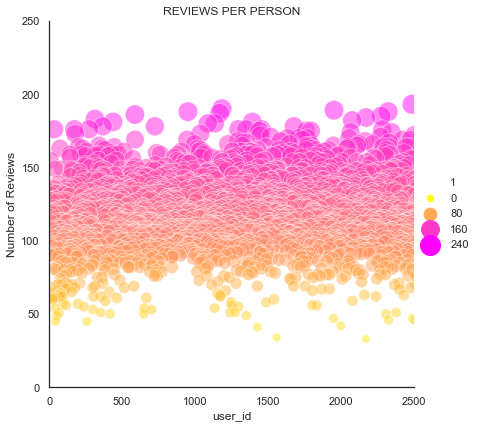

In [41]:
# Visualize rating counts per person

count2 = df['user_id'].value_counts()
tuples2 = [tuple((x, y)) for x, y in count2.items()]
tup_df2 = pd.DataFrame(tuples2)

sns.set(style="white")
ax = sns.relplot(x=0, y=1, size=1,
            sizes=(40, 400), alpha=.5, palette='spring_r',
            height=6, data=tup_df2, hue=1)

axes = ax.axes.flatten()
axes[0].set_title("REVIEWS PER PERSON")
axes[0].set_xlim(0,2500)
axes[0].set_ylim(0,250)
axes[0].set_xlabel("user_id")
axes[0].set_ylabel("Number of Reviews")


In [21]:
df['user_id'].value_counts().max() # User id 30944

200

In [22]:
# The user who has reviewed the most books has given the mean rating of 4.21

df[df['user_id']== 30944].rating.mean()

4.21

In [23]:
df['user_id'].value_counts().min() # User id 34590

19

In [24]:
# The user who has reviewed the least books has given the mean rating of 4.47

df[df['user_id']== 34590].rating.mean()

4.473684210526316

[Text(0, 0.5, 'Tag Name'), Text(0.5, 0, 'Tag Count')]

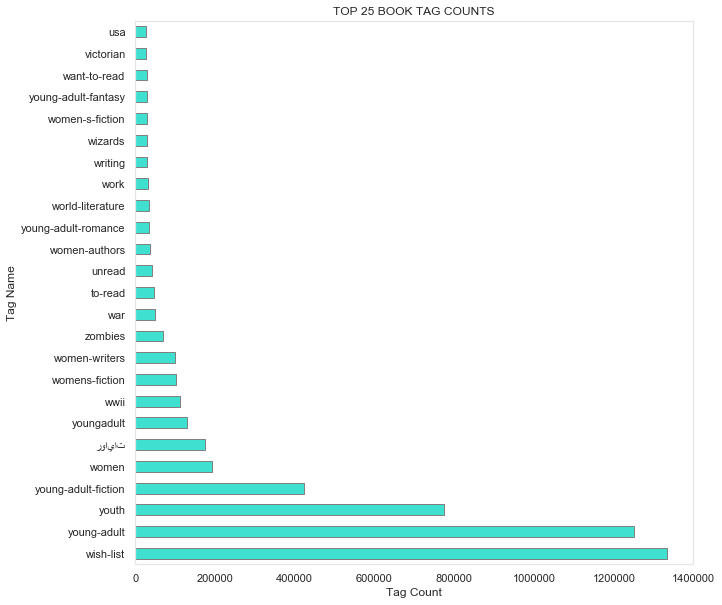

In [43]:
# Visualize the top tags/genres

fig, ax = pyplot.subplots(figsize=(10,10))
sns.set_style('white',{'axes.edgecolor': '.9'},)
df.tag.value_counts()[0:25].plot(kind='barh',color='turquoise',edgecolor='gray', title='TOP 25 BOOK TAG COUNTS')
ax.set(xlabel='Tag Count', ylabel='Tag Name')

In [26]:
# Top 25 most reviewed books

df.title.value_counts()[0:25]

The Hunger Games (The Hunger Games, #1)                             22806
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)            21850
To Kill a Mockingbird                                               19088
Twilight (Twilight, #1)                                             16931
The Great Gatsby                                                    16604
Catching Fire (The Hunger Games, #2)                                16549
Mockingjay (The Hunger Games, #3)                                   15953
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)         15855
Harry Potter and the Chamber of Secrets (Harry Potter, #2)          15657
The Hobbit                                                          15558
Harry Potter and the Goblet of Fire (Harry Potter, #4)              15523
Harry Potter and the Deathly Hallows (Harry Potter, #7)             15304
Harry Potter and the Order of the Phoenix (Harry Potter, #5)        15258
Harry Potter and the Half-Blood Prince

/Users/erikadauria/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


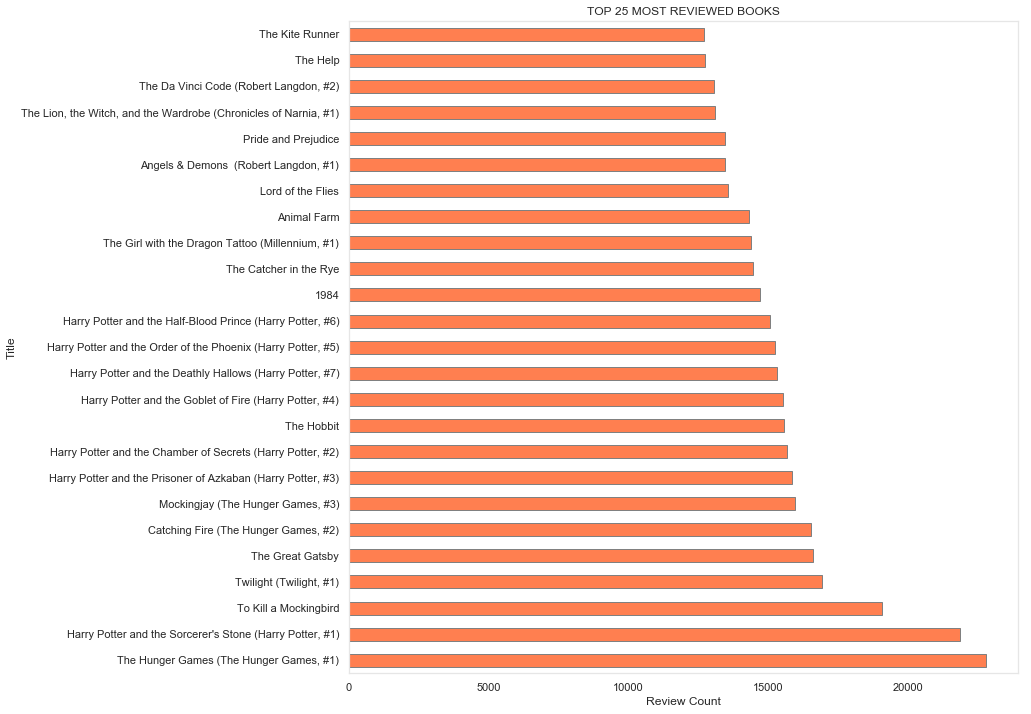

In [44]:
fig, ax = pyplot.subplots(figsize=(12,12))
sns.set_style('white',{'axes.edgecolor': '.9'},)
df.title.value_counts()[0:25].plot(kind='barh',color='coral',edgecolor='gray', title='TOP 25 MOST REVIEWED BOOKS')
ax.set(xlabel='Review Count', ylabel='Title')
fig.show()

In [29]:
# Save cleaned dataframe as csv 

filepath = r'/Users/erikadauria/Flatiron/Projects/Book_Recommendation_System_Project/cleaned_df.csv'

df.to_csv(filepath, header=True, index=False)

test = pd.read_csv('cleaned_df.csv')
test.head()

,user_id,book_id,rating,authors,title,language_code,average_rating,tag
0,1,258,5,"Carlos Ruiz Zafón, Lucia Graves",The Shadow of the Wind (The Cemetery of Forgot...,eng,4.24,wish-list
1,2,4081,4,Tom Wolfe,I am Charlotte Simmons,en-US,3.40,young-adult
2,2,260,5,Dale Carnegie,How to Win Friends and Influence People,eng,4.13,تنمية-بشرية
3,2,9296,5,"Alice Miller, Ruth Ward",The Drama of the Gifted Child: The Search for ...,en-GB,4.09,wish-list
4,2,2318,3,"Thomas J. Stanley, William D. Danko",The Millionaire Next Door: The Surprising Secr...,eng,4.00,wish-list
